In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_path = '/kaggle/input/titanic/train.csv'
test_path = '/kaggle/input/titanic/test.csv'
example_submission = '/kaggle/input/titanic/gender_submission.csv'

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Peek on data


In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
print('Train : ', train.shape)
print('Test : ', test.shape)

Train :  (891, 12)
Test :  (418, 11)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## <b> NOTE </b>
In test there is one <b>Fare</b> Null

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Separating data by Feature types for better analysis
# Numerical (discrete)
num_disc = train[['SibSp', 'Parch']].copy()
# Numerical (continuous)
num_cont = train[['Age', 'Fare']].copy()
# Categorical (Nominal and Ordinal(Pclass))
cat_attrs = train[['Survived', 'Pclass', 'Name', 'Sex', 'Embarked']].copy()
# Mixed 
mix_attrs = train[['Ticket', 'Cabin']].copy()

# Exploratory Data Analysis

In [10]:
from scipy import stats

## Univariate Analysis

### <b> Distributions of Continuous features </b>

Skewness
 Age :  0.38910778230082704
 Fare :  4.787316519674893


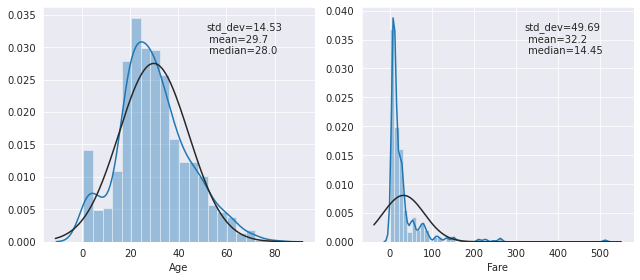

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))

sns.distplot(num_cont.iloc[:,0].dropna(), ax=axs[0], fit=stats.norm)
sns.distplot(num_cont.iloc[:,1].dropna(), ax=axs[1], fit=stats.norm)

for i in range(2):
    col = num_cont.iloc[:,i]
    axs[i].text(x=0.6, y=0.8, s=f'std_dev={round(col.std(),2)}\n mean={round(col.mean(),2)}\n median={round(col.median(),2)}', transform=axs[i].transAxes)

print('Skewness\n Age : ', num_cont.iloc[:,0].skew())
print(' Fare : ', num_cont.iloc[:,1].skew())
    
plt.tight_layout()

#### <b> Note </b>
Let's check log from <b>Fare</b>

Skewness LOG 
 Age (not good) :  -1.8774882259647614
 Fare :  0.3949280095189306


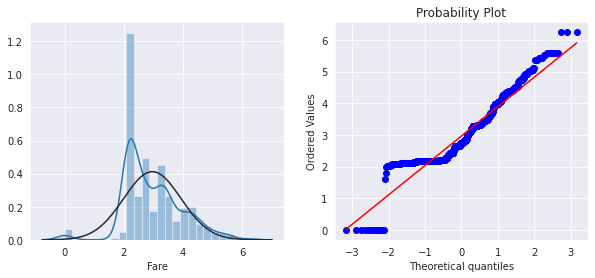

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.distplot(np.log1p(train['Fare'].dropna()), fit=stats.norm, ax=axs[0])
stats.probplot(np.log1p(train['Fare'].dropna()), plot=axs[1])

print('Skewness LOG \n Age (not good) : ', np.log1p(train['Age'].dropna()).skew())
print(' Fare : ', np.log1p(train['Fare'].dropna()).skew())

# Plots for FARE
plt.show()

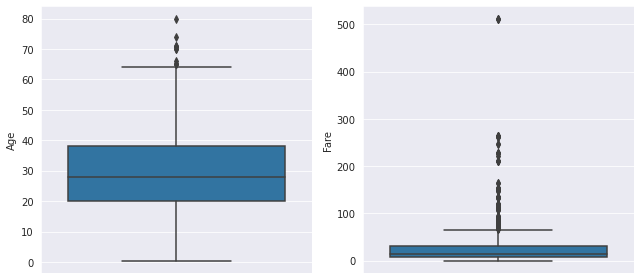

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))

sns.boxplot(y=num_cont.iloc[:,0].dropna(), ax=axs[0])
sns.boxplot(y=num_cont.iloc[:,1].dropna(), ax=axs[1])

plt.tight_layout()

In [14]:
train[train['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Discrete numerical features

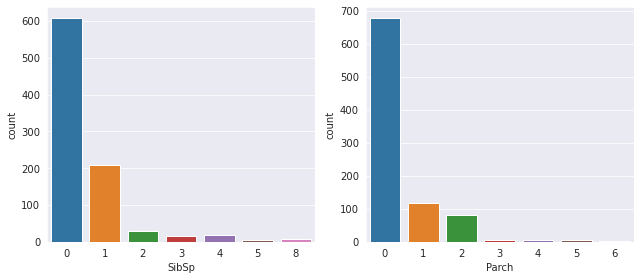

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))

sns.countplot(num_disc.iloc[:,0].dropna(), ax=axs[0])
sns.countplot(num_disc.iloc[:,1].dropna(), ax=axs[1])

plt.tight_layout()

### Categorical features

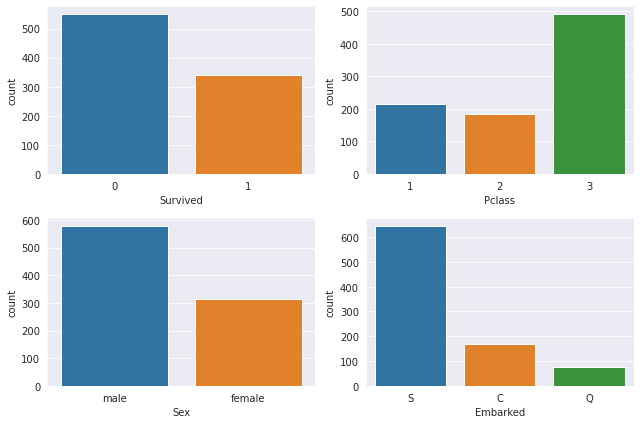

In [16]:
fig = plt.figure(figsize=(9,6))
# Drop name
for idx, col in enumerate(cat_attrs.drop('Name', axis=1)):
    plt.subplot(2, 2, idx+1)
    sns.countplot(cat_attrs.loc[:,col].dropna())
    
plt.tight_layout()

## Bi-Variate Analysis

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


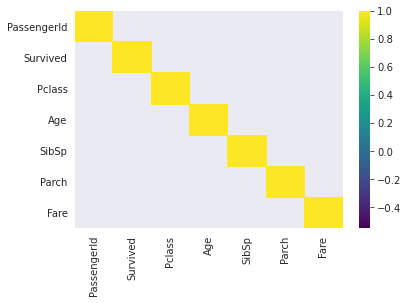

In [17]:
sns.heatmap(train.corr(), mask=train.corr()<0.6, cmap='viridis')
train.corr()[['Survived']].sort_values(by='Survived', ascending=False)

No multicolinearity

### Peek at Mixed types (Cabin and Ticket)

In [18]:
# Cabin counts
cabin_vc = mix_attrs['Cabin'].value_counts()
cabin_specs = dict()
for n in set(cabin_vc):
    cabin_specs[n] = sum(cabin_vc==n)
    
print('Noted cabins :', sum([pair[0]*pair[1] for pair in cabin_specs.items()]), f'/ {len(train)}' ) 
pd.DataFrame(cabin_specs.items(), columns=['People in cabin', 'Quantity of Cabins'])

Noted cabins : 204 / 891


,People in cabin,Quantity of Cabins
0,1,101
1,2,38
2,3,5
3,4,3


In [19]:
# Ticket counts
train['Ticket'].value_counts()
ticket_vc = train['Ticket'].value_counts()
ticket_specs = dict()
for n in set(ticket_vc):
    ticket_specs[n] = sum(ticket_vc==n)
    
print('Noted Tickets :', sum([pair[0]*pair[1] for pair in ticket_specs.items()]), f'/ {len(train)}' ) 
pd.DataFrame(ticket_specs.items(), columns=['People per ticket', 'Quantity of tickets'])

Noted Tickets : 891 / 891


,People per ticket,Quantity of tickets
0,1,547
1,2,94
2,3,21
3,4,11
4,5,2
5,6,3
6,7,3


### Note 

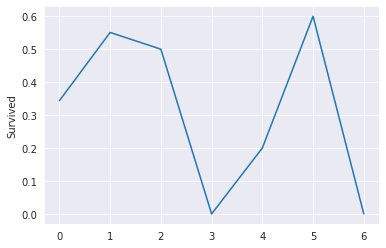

In [20]:
sns.lineplot(x=train.Parch.unique(), y=train.groupby('Parch')['Survived'].mean(), data=train)

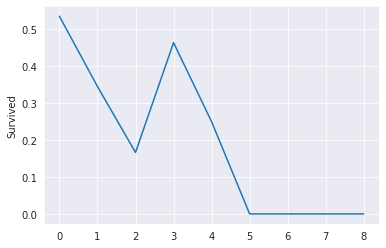

In [21]:
sns.lineplot(x=train.SibSp.unique(), y=train.groupby('SibSp')['Survived'].mean(), data=train)

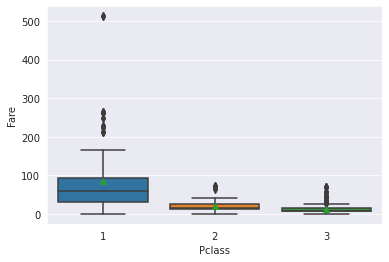

In [22]:
sns.boxplot(x='Pclass', y='Fare', data=train, showmeans=True)
# mean
# 78.12 after dropping Fare>400 train.drop(train[train['Fare']>400].index)
# 84.15 without dropping

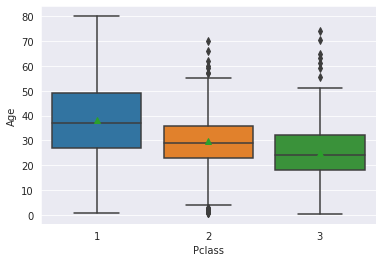

In [23]:
sns.boxplot(x='Pclass', y='Age', data=train, showmeans=True)

# Data Preprocessing

## Drop features

In [24]:
missing_data = pd.DataFrame((train.isna().sum() / len(train)).round(4)*100, columns=['Missing %'] )
missing_data

,Missing %
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


Drop Cabin, impute Age (based on Pclass mean), Impute Embark (most_frequent), Impute Fare (based on Pclass mean/med in case of dropping outlier)

## Removing Outliers

> #### Remove Fare>250

# Feature Engineering

In [25]:
train_fe = train.copy()
train_fe.head()

test_fe = test.copy()

> ### Ideas: 
* Pull Title from Name
* Create Family Size from SibSp & Parch
* Get cabin symbols
* Get ticket type num/not num
* Get number of registered cabins for user

In [26]:
all_titles = ['Mr.','Miss.','Mrs.','Master.','Rev.','Don.','Dr.','Ms.','Col.','Major.','Capt.','Jonkheer.','Countess.','Mme.','Mlle.','Lady.','Sir.']

def get_title(name):
    for s in name.split():
        if s in all_titles:
            return s

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


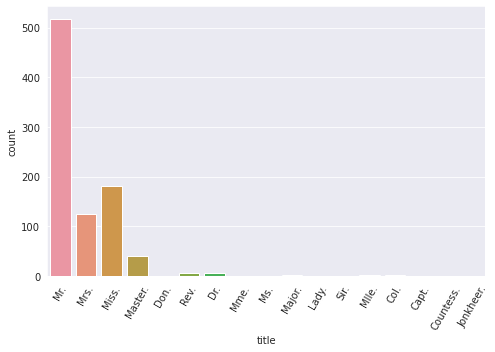

In [27]:
train_fe['title'] = train_fe['Name'].apply(get_title)
# Mlle and Mme -> Mademoiselle (equivalent of Miss)

# Visualization
plt.figure(figsize=(7,5))
sns.countplot(train_fe['title'])
plt.xticks(rotation=60)
plt.tight_layout()

train_fe.head()

### Note lets pick Mr, Mrs, Miss, Master, and other

title
Master.    0.575000
Miss.      0.704301
Mr.        0.156673
Mrs.       0.792000
other      0.347826
Name: Survived, dtype: float64

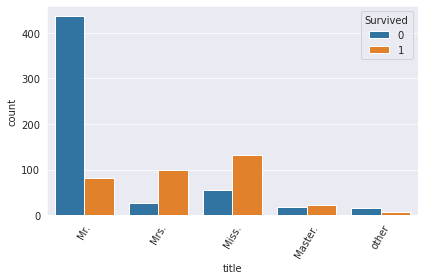

In [28]:
# bin titles
titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
train_fe.loc[(train_fe['title']=='Mme.') | (train_fe['title']=='Mlle.') | (train_fe['title']=='Ms.'), 'title'] = 'Miss.'
train_fe.loc[~train_fe['title'].isin(titles), 'title'] = 'other'

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(train_fe['title'], hue='Survived', data=train_fe)
plt.xticks(rotation=60)
plt.tight_layout()

# Survived Percentage
train_fe.groupby('title')['Survived'].mean()

In [29]:
# Changing to Ordinal type
train_fe['title'] = train_fe['title'].map({'Mr.': 0, 'other': 1, 'Master.': 2, 'Miss.': 3, 'Mrs.': 4})

# TEST
test_fe['title'] = test_fe['Name'].apply(get_title)
test_fe.loc[(test_fe['title']=='Mme.') | (test_fe['title']=='Mlle.') | (test_fe['title']=='Ms.'), 'title'] = 'Miss.'
test_fe.loc[~test_fe['title'].isin(titles), 'title'] = 'other'
# Changing to Ordinal type
test_fe['title'] = test_fe['title'].map({'Mr.': 0, 'other': 1, 'Master.': 2, 'Miss.': 3, 'Mrs.': 4})
test_fe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4


> ## Create family size

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


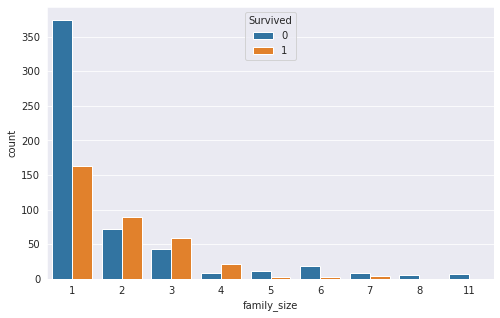

In [30]:
train_fe['family_size'] = train_fe['SibSp'] + train_fe['Parch'] + 1

# Visualization
plt.figure(figsize=(8,5))
sns.countplot(train_fe['family_size'], hue='Survived', data=train_fe)
train_fe.head()

> ### Family of size 1 and >4 have advantage of NOT survived
> ### While Fs (2,3,4) have advantage of Survived

Note Lets bin into 3 categories (<b>S</b>olo, <b>M</b>iddle sized family, <b>L</b>arge family) => (1, 2-4, 5>=)

In [31]:
def bin_family_size(x):
    if x>4:
        return 'l'
    elif x>1:
        return 'm'
    else :
        return 's'
    
# TRAIN
train_fe.loc[:, 'family_size'] = train_fe.loc[:, 'family_size'].apply(bin_family_size) 

# TEST
test_fe['family_size'] = test_fe['SibSp'] + test_fe['Parch'] + 1
test_fe.loc[:, 'family_size'] = test_fe.loc[:, 'family_size'].apply(bin_family_size) 
test_fe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,s
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,m
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,s
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,s
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4,m


In [32]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoding Family_size
oh_family = OneHotEncoder(sparse=False)

train_fam_code = pd.DataFrame(oh_family.fit_transform(train_fe['family_size'].values.reshape(-1,1)))
test_fam_code = pd.DataFrame(oh_family.transform(test_fe['family_size'].values.reshape(-1,1)))

train_fam_code.index = train_fe.index
test_fam_code.index = test_fe.index

train_fe = pd.concat([train_fe.drop('family_size', axis=1), train_fam_code], axis=1)
test_fe = pd.concat([test_fe.drop('family_size', axis=1), test_fam_code], axis=1)
test_fe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,0,1,2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4,0.0,1.0,0.0


 > ## Cabin and ticket (cabin symbol, ticket num/not_num, cabin multiple)


In [33]:
train_fe['cabin_symbol'] = train_fe['Cabin'].apply(lambda x: str(x)[0])
test_fe['cabin_symbol'] = test_fe['Cabin'].apply(lambda x: str(x)[0])

# Visualization
print(train_fe['cabin_symbol'].value_counts())
pd.pivot_table(train_fe, index='Survived', columns='cabin_symbol', values='PassengerId', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_symbol, dtype: int64


cabin_symbol,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [34]:
# Ordinal Encoding
cab_codes = {'T': 0, 'n': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

print(train_fe.groupby('cabin_symbol')['Survived'].mean().sort_values())
train_fe['cabin_symbol'] = train_fe['cabin_symbol'].map(cab_codes)
test_fe['cabin_symbol'] = test_fe['cabin_symbol'].map(cab_codes)
train_fe.head()

cabin_symbol
T    0.000000
n    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,0,1,2,cabin_symbol
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,1.0,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.0,1.0,0.0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0.0,0.0,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0.0,1.0,0.0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0,0.0,1.0,1


In [35]:
train_fe['num_ticket'] = train_fe['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
test_fe['num_ticket'] = test_fe['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

# Visualization
print(train_fe['num_ticket'].value_counts())
pd.pivot_table(train_fe, index='Survived', columns='num_ticket', values='PassengerId', aggfunc='count')

1    661
0    230
Name: num_ticket, dtype: int64


num_ticket,0,1
Survived,,
0,142,407
1,88,254


In [36]:
train_fe['numberof_cabin'] = train_fe['Cabin'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
test_fe['numberof_cabin'] = test_fe['Cabin'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Visualization
pd.pivot_table(train_fe, index='Survived', columns='numberof_cabin', values='PassengerId', aggfunc='count')

numberof_cabin,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


# Modeling

In [37]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Helper Functions

In [38]:
def impute_age(X):
    # Collecting averages based on Pclass
    means_pclass = [m for m in X.groupby('Pclass')['Age'].mean().round(1)]
    # Iterate through rows
    for idx, row in X.iterrows():
        # If Age is null the fill with adequate mean
        if pd.isnull(row.Age):
            if row.Pclass == 1:
                X.loc[idx, 'Age'] = means_pclass[0] 
            elif row.Pclass == 2:
                X.loc[idx, 'Age'] = means_pclass[1]
            else :
                X.loc[idx, 'Age'] = means_pclass[2]    
    return X

In [39]:
def impute_fare(X):
    # Collecting averages based on Pclass
    means_pclass = [m for m in X.groupby('Pclass')['Fare'].mean().round(2)]
    # Iterate through rows
    for idx, row in X.iterrows():
        # If Fare is null the fill with adequate mean
        if pd.isnull(row.Fare):
            if row.Pclass == 1:
                X.loc[idx, 'Fare'] = means_pclass[0] 
            elif row.Pclass == 2:
                X.loc[idx, 'Fare'] = means_pclass[1]
            else :
                X.loc[idx, 'Fare'] = means_pclass[2]    
    return X

In [40]:
def log_fare(X):
    X['Fare'] = np.log1p(X['Fare'])
    return X

In [41]:
# # Creating ClfSwitcher for Estimators 
# class ClfSwitcher(BaseEstimator):
#     def __init__(self, estimator=XGBClassifier(n_estimators=450, learning_rate=0.01)):
#         self.estimator = estimator
        
#     def fit(self, X, y=None, **kwargs):
#         self.estimator.fit(X,y)
#         return self
    
#     def predict(self, X, y=None):
#         return self.estimator.predict(X)
    
#     def score(self, X, y):
#         return self.estimator.score(X, y)

In [42]:
def cv_raport(workflow_name, score):
    print(workflow_name, ':')
    print('Mean Accuracy Score :', score.mean())
    print()

In [43]:
def gridcv_raport(workflow_name, grid):
    print(workflow_name, ':')
    print('Best Score :', grid.best_score_)
    print('Best Parameters :', grid.best_params_)
    print()

## Workflow

In [44]:
feed = train_fe.copy()

# Drop outliers
feed = feed.drop(feed.loc[feed['Fare']>250].index)

X = feed.drop(['PassengerId', 'Survived', 'Cabin', 'Name', 'Ticket','SibSp', 'Parch', 'num_ticket'], axis=1).copy()
y = feed.Survived
# not used from feature engineering : num_ticket
X.head()

,Pclass,Sex,Age,Fare,Embarked,title,0,1,2,cabin_symbol,numberof_cabin
0,3,male,22.0,7.2500,S,0,0.0,1.0,0.0,1,0
1,1,female,38.0,71.2833,C,4,0.0,1.0,0.0,4,1
2,3,female,26.0,7.9250,S,3,0.0,0.0,1.0,1,0
3,1,female,35.0,53.1000,S,4,0.0,1.0,0.0,4,1
4,3,male,35.0,8.0500,S,0,0.0,0.0,1.0,1,0


In [45]:
# Impute Age and Fare based on Pclass, Log1p Fare
pipe_helper1 = Pipeline([
    ('impute_age', FunctionTransformer(impute_age)),
    ('impute_fare', FunctionTransformer(impute_fare)),
    #('categorize_age', FunctionTransformer(bin_age))
    ('log1p_fare', FunctionTransformer(log_fare)),
])

embark_preprocess = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('oh_encode', OneHotEncoder(sparse=False, drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('embark', embark_preprocess, ['Embarked']),
    ('helper1', pipe_helper1, ['Age', 'Fare', 'Pclass']),
    ('oh_sex', OneHotEncoder(drop='first', sparse=False), ['Sex']),
], remainder='passthrough')


#---------------- Workflows ----------------
XGB_workflow = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier())#n_estimators=450, learning_rate=0.01))
])

RndFor_workflow = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier())
])

SVC_workflow = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('clf', SVC())
])

LogReg_workflow = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('clf', LogisticRegression())
])

Knn_workflow = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

#---------------- Fit the pipelines ----------------
XGB_workflow.fit(X, y)
RndFor_workflow.fit(X, y)
SVC_workflow.fit(X, y)
LogReg_workflow.fit(X, y)
Knn_workflow.fit(X, y)


# How data looks after transformations
transformed_X = pd.DataFrame(preprocessor.fit_transform(X))
print(transformed_X)

      0    1     2         3    4    5    6    7    8    9    10   11
0    0.0  1.0  22.0  2.110213  3.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0
1    0.0  0.0  38.0  4.280593  1.0  0.0  4.0  0.0  1.0  0.0  4.0  1.0
2    0.0  1.0  26.0  2.188856  3.0  0.0  3.0  0.0  0.0  1.0  1.0  0.0
3    0.0  1.0  35.0  3.990834  1.0  0.0  4.0  0.0  1.0  0.0  4.0  1.0
4    0.0  1.0  35.0  2.202765  3.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
..   ...  ...   ...       ...  ...  ...  ...  ...  ...  ...  ...  ...
877  0.0  1.0  27.0  2.639057  2.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0
878  0.0  1.0  19.0  3.433987  1.0  0.0  3.0  0.0  0.0  1.0  6.0  1.0
879  0.0  1.0  25.1  3.196630  3.0  0.0  3.0  0.0  1.0  0.0  1.0  0.0
880  0.0  0.0  26.0  3.433987  1.0  1.0  0.0  0.0  0.0  1.0  4.0  1.0
881  1.0  0.0  32.0  2.169054  3.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0

[882 rows x 12 columns]


> > # Not tuned Models performance

In [46]:
# Performance Reports
cv_raport('XGB', cross_val_score(XGB_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('RandomForest', cross_val_score(RndFor_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('SVC', cross_val_score(SVC_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('LogisticRegression', cross_val_score(LogReg_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('KNN', cross_val_score(Knn_workflow, X, y, cv=5, scoring='accuracy'))

XGB :
Mean Accuracy Score : 0.8174563430919364

RandomForest :
Mean Accuracy Score : 0.8231574216743708

SVC :
Mean Accuracy Score : 0.8287942989214174

LogisticRegression :
Mean Accuracy Score : 0.8276643554185927

KNN :
Mean Accuracy Score : 0.822027478171546



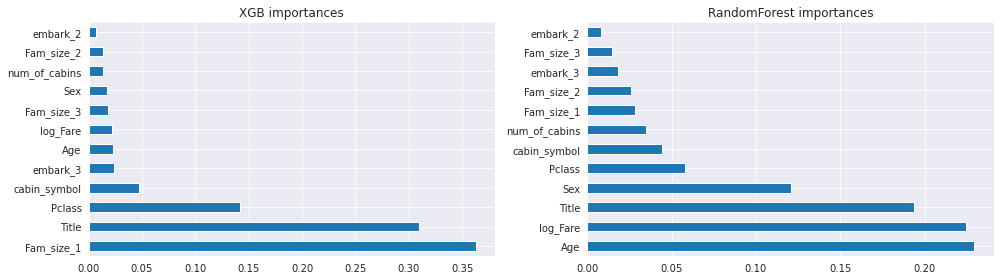

In [47]:
idxs = ['embark_2', 'embark_3', 'Age', 'log_Fare', 'Pclass', 'Sex', 'Title', 'Fam_size_1', 'Fam_size_2', 'Fam_size_3', 'cabin_symbol', 'num_of_cabins']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
pd.Series(XGB_workflow['clf'].feature_importances_, index=idxs).nlargest(20).plot(kind='barh', ax=ax1, title='XGB importances')
pd.Series(RndFor_workflow['clf'].feature_importances_, index=idxs).nlargest(20).plot(kind='barh', ax=ax2, title='RandomForest importances')
plt.tight_layout()

> ## Tuning models

In [48]:
params = {
    'XGB': {
        'clf__n_estimators': [30, 70, 120, 250, 350, 500, 600],
        'clf__reg_alpha': [0, 0.5, 1, 2],
        'clf__reg_lambda': [1, 1.5, 2],
        'clf__learning_rate': [0.005, 0.01, 0.07, 0.1, 0.4],
        'clf__sampling_method': ['uniform', 'gradient_based'],
        'clf__subsample': [0.5, 0.6, 0.7, 0.8],
        'clf__gamma': [0.01, 0.1, 0.2, 0.4, 0.6],
        'clf__max_depth': [2, 3, 4, 10, 20, 30, None],
        'clf__min_child_weight': [0, 0.01, 0.1, 1, 10, 100]
    },
    'RndFor': {
        'clf__n_estimators': [100, 200, 250, 300, 350],
        'clf__bootstrap': [True, False],
        'clf__max_depth': [3, 4, 10, 20, 50, 75, None],
        'clf__max_features': ['auto', 'sqrt'],
        'clf__min_samples_leaf': [1, 2, 4, 10],
        'clf__min_samples_split': [2, 5, 10]
    },
    'SVC': [
        {'clf__kernel': ['rbf'], 'clf__gamma': [0.05, 0.1, 0.5, 1, 2, 5, 10], 'clf__C': [0.1, 1, 10, 100]},
        {'clf__kernel': ['poly'], 'clf__degree': [2,3,4,5], 'clf__C': [0.1, 1, 10, 100]},
        {'clf__kernel': ['linear'], 'clf__C': [0.1, 1, 10, 100]}
        
    ],
    'LogReg': {
        'clf__max_iter': [2000],
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['liblinear'],
        'clf__C': [0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 3, 5, 10, 15, 20, 25]
    },
    'Knn': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'clf__p': [1, 2]
    }
}

narrowed_params = {
    'RndFor': {
        'clf__n_estimators': [50, 70, 100],
        'clf__bootstrap': [True, False],
        'clf__max_depth': [40, 50, 60],
        'clf__max_features': ['auto'],
        'clf__min_samples_leaf': [1, 4],
        'clf__min_samples_split': [10, 15, 18]
    },
    'XGB': {
        'clf__n_estimators': [50, 70, 90, 110],
        'clf__reg_alpha': [0, 1],
        'clf__reg_lambda': [1, 2],
        'clf__learning_rate': [0.07, 0.1],
        'clf__sampling_method': ['uniform', 'gradient_based'],
        'clf__subsample': [0.5, 0.6],
        'clf__gamma': [0.6, 0.7],
        'clf__max_depth': [20, 25],
        'clf__min_child_weight': [0]        
    }    
}

In [49]:
# rnd_search = RandomizedSearchCV(XGB_workflow, params['XGB'], n_iter=250, cv=5, verbose=True, n_jobs=-1)
# best_search = rnd_search.fit(X, y)
# gridcv_raport('XGB', best_search)

In [50]:
# grid = GridSearchCV(XGB_workflow, narrowed_params['XGB'], cv=5, verbose=True, n_jobs=-1)
# best_XGB = grid.fit(X, y)
# gridcv_raport('XGB', best_XGB)

In [51]:
# rnd_search = RandomizedSearchCV(RndFor_workflow, params['RndFor'], n_iter=150, cv=5, verbose=True, n_jobs=-1)
# best_search = rnd_search.fit(X, y)
# gridcv_raport('RandomForest', best_search)

In [52]:
# grid = GridSearchCV(RndFor_workflow, narrowed_params['RndFor'], cv=5, verbose=True, n_jobs=-1)
# best_RndFor = grid.fit(X, y)
# gridcv_raport('Random Forest', best_RndFor)

In [53]:
# grid = GridSearchCV(SVC_workflow, params['SVC'], cv=5, verbose=True, n_jobs=-1)
# best_SVC = grid.fit(X, y)
# gridcv_raport('SVC', best_SVC)

In [54]:
# grid = GridSearchCV(LogReg_workflow, params['LogReg'], cv=5, verbose=True, n_jobs=-1)
# best_lr = grid.fit(X, y)
# gridcv_raport('LogisticRegression', best_lr)

In [55]:
# grid = GridSearchCV(Knn_workflow, params['Knn'], cv=5, verbose=True, n_jobs=-1)
# best_Knn = grid.fit(X, y)
# gridcv_raport('Knn', best_Knn)

> # Model Performance after tuning :
* XGB 81,7 % => <b>84,5</b>
* RandomForest 81,9 % => <b>84,1</b>
* SVC 82,8 % => <b>83,3</b>
* LogisticRegression 82,7 % => <b>82,9</b>
* KNN 82,2 % => <b>82,4</b>

In [56]:
XGB_workflow.set_params(**{'clf__gamma': 0.7, 'clf__learning_rate': 0.07, 'clf__max_depth': 20, 'clf__min_child_weight': 0,
                           'clf__n_estimators': 90, 'clf__reg_alpha': 1, 'clf__reg_lambda': 1, 'clf__sampling_method': 'uniform', 'clf__subsample': 0.6})
RndFor_workflow.set_params(**{'clf__bootstrap': True, 'clf__max_depth': 40, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1,
                              'clf__min_samples_split': 10, 'clf__n_estimators': 50})
SVC_workflow.set_params(**{'clf__C': 10, 'clf__gamma': 0.05, 'clf__kernel': 'rbf'})
LogReg_workflow.set_params(**{'clf__C': 15, 'clf__max_iter': 2000, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'})

XGB_workflow.fit(X, y)
RndFor_workflow.fit(X, y)
SVC_workflow.fit(X, y)
LogReg_workflow.fit(X, y)
Knn_workflow.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('embark',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Embarked']),
                                                 ('helper1',
                                                  Pipeline(steps=[('impute_age',
                                                                   FunctionTransformer(func=<function impute_age at 0x7f2ea48fdc20>)),
                                             

In [57]:
# Performance Reports after tuning
cv_raport('XGB', cross_val_score(XGB_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('RandomForest', cross_val_score(RndFor_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('SVC', cross_val_score(SVC_workflow, X, y, cv=5, scoring='accuracy'))
cv_raport('LogisticRegression', cross_val_score(LogReg_workflow, X, y, cv=5, scoring='accuracy'))

XGB :
Mean Accuracy Score : 0.8458397534668721

RandomForest :
Mean Accuracy Score : 0.8276964560862867

SVC :
Mean Accuracy Score : 0.8333525937339497

LogisticRegression :
Mean Accuracy Score : 0.8299435028248586



# Submission

In [58]:
X_test = test_fe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket','SibSp', 'Parch', 'num_ticket'], axis=1).copy()
predictionsXGB = XGB_workflow.predict(X_test)
predictionsRndFor = RndFor_workflow.predict(X_test)
predictionsSVC = SVC_workflow.predict(X_test)
predictionsLogReg = LogReg_workflow.predict(X_test)

In [59]:
for model in (predictionsRndFor, predictionsSVC, predictionsLogReg):
    print('Differences with XGB:')
    print(np.sum(predictionsXGB != model))

Differences with XGB:
22
Differences with XGB:
39
Differences with XGB:
40


In [60]:
submission_XGB = pd.DataFrame(
    {
        'PassengerId': test_fe.PassengerId,
        'Survived': predictionsXGB
    })
submission_XGB.to_csv('submission_XGB.csv', index=False)

submission_RF = pd.DataFrame(
    {
        'PassengerId': test_fe.PassengerId,
        'Survived': predictionsRndFor
    })
submission_RF.to_csv('submission_RF.csv', index=False)

submission_SVC = pd.DataFrame(
    {
        'PassengerId': test_fe.PassengerId,
        'Survived': predictionsSVC
    })
submission_SVC.to_csv('submission_SVC.csv', index=False)

submission_LogReg = pd.DataFrame(
    {
        'PassengerId': test_fe.PassengerId,
        'Survived': predictionsLogReg
    })
submission_LogReg.to_csv('submission_LogReg.csv', index=False)